In [1]:
import numpy as np
import pandas as pd
import math
import random

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime, timedelta
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}

plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

import pandas_profiling
import datetime

### Readin and Profile Episode Ratings and Program Ratings

#### Episode Ratings

In [2]:
ratings = pd.read_csv("/Users/ling/Desktop/Interview/Peacock/mxm.csv")
ratings.head()

,Unnamed: 0,Network,Date,Time,Program,Length,Rating,Minute_In_Commercial,Total_Loss_perc
0,0,DKN,2015-09-21,10:00 PM,BLACK_S_BOT,60,3.735534,0,15.637767
1,1,DKN,2015-09-21,10:01 PM,BLACK_S_BOT,60,3.528162,0,5.965321
2,2,DKN,2015-09-21,10:02 PM,BLACK_S_BOT,60,3.540440,0,6.501681
3,3,DKN,2015-09-21,10:03 PM,BLACK_S_BOT,60,3.478097,0,5.259257
4,4,DKN,2015-09-21,10:04 PM,BLACK_S_BOT,60,3.385776,0,3.366675


In [3]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2088 entries, 0 to 2087
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            2088 non-null   int64  
 1   Network               2088 non-null   object 
 2   Date                  2088 non-null   object 
 3   Time                  2088 non-null   object 
 4   Program               2088 non-null   object 
 5   Length                2088 non-null   int64  
 6   Rating                2088 non-null   float64
 7   Minute_In_Commercial  2088 non-null   int64  
 8   Total_Loss_perc       2088 non-null   float64
dtypes: float64(2), int64(3), object(4)
memory usage: 146.9+ KB


In [4]:
# ratings_profile = pandas_profiling.ProfileReport(ratings)
# ratings_profile
ratings_profile = pandas_profiling.ProfileReport(ratings)
ratings_profile.to_file(output_file='ratings_profile.html')

#### Program Ratings

In [5]:
programs = pd.read_csv("/Users/ling/Desktop/Interview/Peacock/seasonal_telecast_ratings.csv")
programs.head()

,Unnamed: 0,show_name,network,genre,time_slot,program_start_time,program_duration,show_premier,show_repeat,rating
0,0,OF WOLVES AND MAN,JGN,Drama,2015-09-20 20:00:00,2015-09-20 20:00:00,3600,0,1,0.006776
1,1,OF WOLVES AND MAN,JGN,Drama,2015-09-20 21:00:00,2015-09-20 21:00:00,7200,0,1,0.005118
2,2,OF WOLVES AND MAN,JGN,Drama,2015-09-27 20:00:00,2015-09-27 20:00:00,3600,1,0,0.021757
3,3,OF WOLVES AND MAN,JGN,Drama,2015-10-04 20:00:00,2015-10-04 20:00:00,3600,0,0,0.018664
4,4,OF WOLVES AND MAN,JGN,Drama,2015-10-11 20:00:00,2015-10-11 20:00:00,3600,0,0,0.016884


In [6]:
programs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4598 entries, 0 to 4597
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          4598 non-null   int64  
 1   show_name           4593 non-null   object 
 2   network             4598 non-null   object 
 3   genre               4598 non-null   object 
 4   time_slot           4598 non-null   object 
 5   program_start_time  4598 non-null   object 
 6   program_duration    4598 non-null   int64  
 7   show_premier        4598 non-null   int64  
 8   show_repeat         4598 non-null   int64  
 9   rating              4598 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 359.3+ KB


In [7]:
# program_profile = pandas_profiling.ProfileReport(pragrams)
# program_profile
program_profile = pandas_profiling.ProfileReport(programs)
program_profile.to_file(output_file='programs_profile.html')

#### Program Ratings for Mr.Bl@ck.s.bot 

Collect the same period of program data from 2015/9/2 to 2017/1/18, which alligned with Mr.Black@bot Season 1 and 2

In [8]:
## Consider only BlackClickBot 
program_black = programs.copy()
program_black['program_start_time'] = pd.to_datetime(program_black['program_start_time'])
program_black['date'] = program_black['program_start_time'].apply(lambda x: x.date())
program_black = program_black.loc[(program_black.date >= datetime.date(2015, 9, 21))]
program_black = program_black.loc[(program_black.date <= datetime.date(2017, 1, 18))]

In [10]:
# program_profile = pandas_profiling.ProfileReport(rogram_black)
# program_profile
program_profile = pandas_profiling.ProfileReport(program_black)
program_profile.to_file(output_file='black_program_profile.html')

### Ratings and Loss % by date

In [10]:
ratings['dateTime'] = ratings['Date'] + ' ' + ratings['Time']

In [11]:
ratings['dateTime'] = pd.to_datetime(ratings['dateTime'])

In [12]:
ratings['date'] = ratings['dateTime'].apply(lambda x: x.date())
ratings['season'] = ratings['date'].apply(lambda x: 'Season 1' if x>=datetime.date(2015, 9, 21) and x<=datetime.date(2016, 5, 23) else 'Season 2')

In [13]:
ratings.groupby('season').size()

season
Season 1    1368
Season 2     720
dtype: int64

In [14]:
ratings['Rating'].describe()

count    2088.000000
mean        1.706287
std         0.469426
min         0.955006
25%         1.372028
50%         1.552339
75%         1.963901
max         3.831234
Name: Rating, dtype: float64

In [152]:
avg_rate = (ratings.groupby(['date'])
 .agg({'Rating':('mean')})
 .reset_index()
 .sort_values('date')
)
avg_total_Loss_perc = (ratings.groupby(['date'])['Total_Loss_perc'].mean()
 .reset_index()
 .sort_values('date')
)

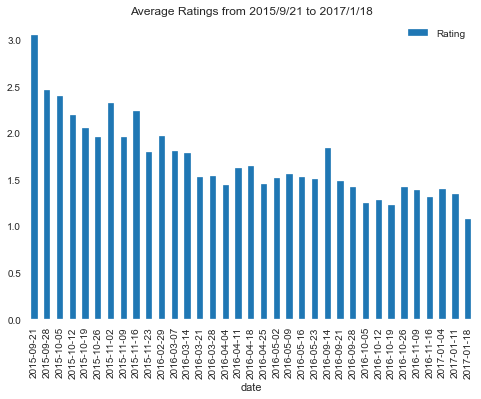

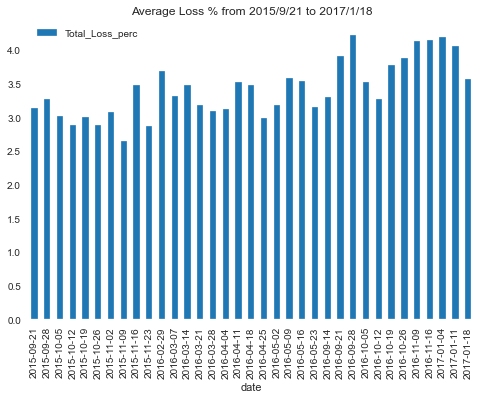

In [153]:
avg_rate.plot.bar(x="date", y="Rating", title="Average Ratings from 2015/9/21 to 2017/1/18");
avg_total_Loss_perc.plot.bar(x="date", y="Total_Loss_perc", title="Average Loss % from 2015/9/21 to 2017/1/18")
plt.show()

In [21]:
ratings.nlargest(10, columns='Rating')

,Unnamed: 0,Network,Date,Time,Program,Length,Rating,Minute_In_Commercial,Total_Loss_perc,dateTime,date,season
1368,1368,DKN,2016-09-14,10:00 PM,BLACK_S_BOT,60,3.831234,0,28.891510,2016-09-14 22:00:00,2016-09-14,Season 2
0,0,DKN,2015-09-21,10:00 PM,BLACK_S_BOT,60,3.735534,0,15.637767,2015-09-21 22:00:00,2015-09-21,Season 1
600,600,DKN,2016-02-29,10:00 PM,BLACK_S_BOT,60,3.638675,0,26.661760,2016-02-29 22:00:00,2016-02-29,Season 1
2,2,DKN,2015-09-21,10:02 PM,BLACK_S_BOT,60,3.540440,0,6.501681,2015-09-21 22:02:00,2015-09-21,Season 1
60,60,DKN,2015-09-28,10:00 PM,BLACK_S_BOT,60,3.529610,0,21.636786,2015-09-28 22:00:00,2015-09-28,Season 1
1,1,DKN,2015-09-21,10:01 PM,BLACK_S_BOT,60,3.528162,0,5.965321,2015-09-21 22:01:00,2015-09-21,Season 1
3,3,DKN,2015-09-21,10:03 PM,BLACK_S_BOT,60,3.478097,0,5.259257,2015-09-21 22:03:00,2015-09-21,Season 1
660,660,DKN,2016-03-07,10:01 PM,BLACK_S_BOT,59,3.414862,0,25.702512,2016-03-07 22:01:00,2016-03-07,Season 1
4,4,DKN,2015-09-21,10:04 PM,BLACK_S_BOT,60,3.385776,0,3.366675,2015-09-21 22:04:00,2015-09-21,Season 1
5,5,DKN,2015-09-21,10:05 PM,BLACK_S_BOT,60,3.337246,0,2.329912,2015-09-21 22:05:00,2015-09-21,Season 1


In [22]:
ratings.nsmallest(10, columns='Rating')

,Unnamed: 0,Network,Date,Time,Program,Length,Rating,Minute_In_Commercial,Total_Loss_perc,dateTime,date,season
2068,2068,DKN,2017-01-18,08:40 PM,BLACK_S_BOT,60,0.955006,1,3.244431,2017-01-18 20:40:00,2017-01-18,Season 2
2069,2069,DKN,2017-01-18,08:41 PM,BLACK_S_BOT,60,0.964660,0,2.836796,2017-01-18 20:41:00,2017-01-18,Season 2
2067,2067,DKN,2017-01-18,08:39 PM,BLACK_S_BOT,60,0.968701,1,3.613537,2017-01-18 20:39:00,2017-01-18,Season 2
2076,2076,DKN,2017-01-18,08:48 PM,BLACK_S_BOT,60,0.972682,1,2.191736,2017-01-18 20:48:00,2017-01-18,Season 2
2077,2077,DKN,2017-01-18,08:49 PM,BLACK_S_BOT,60,0.974435,1,1.896227,2017-01-18 20:49:00,2017-01-18,Season 2
2078,2078,DKN,2017-01-18,08:50 PM,BLACK_S_BOT,60,0.981209,1,1.348651,2017-01-18 20:50:00,2017-01-18,Season 2
2070,2070,DKN,2017-01-18,08:42 PM,BLACK_S_BOT,60,0.982866,1,2.244323,2017-01-18 20:42:00,2017-01-18,Season 2
2058,2058,DKN,2017-01-18,08:30 PM,BLACK_S_BOT,60,0.983418,1,2.010489,2017-01-18 20:30:00,2017-01-18,Season 2
2059,2059,DKN,2017-01-18,08:31 PM,BLACK_S_BOT,60,0.991686,1,2.531508,2017-01-18 20:31:00,2017-01-18,Season 2
2045,2045,DKN,2017-01-18,08:17 PM,BLACK_S_BOT,60,0.993828,1,2.604938,2017-01-18 20:17:00,2017-01-18,Season 2


In [23]:
ratings.nlargest(10, columns = 'Total_Loss_perc')

,Unnamed: 0,Network,Date,Time,Program,Length,Rating,Minute_In_Commercial,Total_Loss_perc,dateTime,date,season
1250,1250,DKN,2016-05-16,10:01 PM,BLACK_S_BOT,59,2.791087,0,29.634020,2016-05-16 22:01:00,2016-05-16,Season 1
1368,1368,DKN,2016-09-14,10:00 PM,BLACK_S_BOT,60,3.831234,0,28.891510,2016-09-14 22:00:00,2016-09-14,Season 2
600,600,DKN,2016-02-29,10:00 PM,BLACK_S_BOT,60,3.638675,0,26.661760,2016-02-29 22:00:00,2016-02-29,Season 1
837,837,DKN,2016-03-28,10:01 PM,BLACK_S_BOT,59,2.862369,0,25.990907,2016-03-28 22:01:00,2016-03-28,Season 1
660,660,DKN,2016-03-07,10:01 PM,BLACK_S_BOT,59,3.414862,0,25.702512,2016-03-07 22:01:00,2016-03-07,Season 1
1309,1309,DKN,2016-05-23,10:01 PM,BLACK_S_BOT,59,2.669922,0,25.463404,2016-05-23 22:01:00,2016-05-23,Season 1
1191,1191,DKN,2016-05-09,10:01 PM,BLACK_S_BOT,59,2.681112,0,25.303860,2016-05-09 22:01:00,2016-05-09,Season 1
1132,1132,DKN,2016-05-02,10:01 PM,BLACK_S_BOT,59,2.593268,0,24.792615,2016-05-02 22:01:00,2016-05-02,Season 1
1014,1014,DKN,2016-04-18,10:01 PM,BLACK_S_BOT,59,2.875911,0,23.574558,2016-04-18 22:01:00,2016-04-18,Season 1
480,480,DKN,2015-11-16,10:00 PM,BLACK_S_BOT,60,3.230364,0,23.532294,2015-11-16 22:00:00,2015-11-16,Season 1


In [24]:
ratings.nsmallest(10, columns = 'Total_Loss_perc')

,Unnamed: 0,Network,Date,Time,Program,Length,Rating,Minute_In_Commercial,Total_Loss_perc,dateTime,date,season
59,59,DKN,2015-09-21,10:59 PM,BLACK_S_BOT,60,3.067311,0,0.0,2015-09-21 22:59:00,2015-09-21,Season 1
119,119,DKN,2015-09-28,10:59 PM,BLACK_S_BOT,60,2.250048,1,0.0,2015-09-28 22:59:00,2015-09-28,Season 1
179,179,DKN,2015-10-05,10:59 PM,BLACK_S_BOT,60,2.227396,1,0.0,2015-10-05 22:59:00,2015-10-05,Season 1
239,239,DKN,2015-10-12,10:59 PM,BLACK_S_BOT,60,2.070064,1,0.0,2015-10-12 22:59:00,2015-10-12,Season 1
299,299,DKN,2015-10-19,10:59 PM,BLACK_S_BOT,60,2.130356,1,0.0,2015-10-19 22:59:00,2015-10-19,Season 1
359,359,DKN,2015-10-26,10:59 PM,BLACK_S_BOT,60,1.983187,1,0.0,2015-10-26 22:59:00,2015-10-26,Season 1
419,419,DKN,2015-11-02,10:59 PM,BLACK_S_BOT,60,2.383369,0,0.0,2015-11-02 22:59:00,2015-11-02,Season 1
479,479,DKN,2015-11-09,10:59 PM,BLACK_S_BOT,60,1.935596,0,0.0,2015-11-09 22:59:00,2015-11-09,Season 1
539,539,DKN,2015-11-16,10:59 PM,BLACK_S_BOT,60,2.273419,0,0.0,2015-11-16 22:59:00,2015-11-16,Season 1
599,599,DKN,2015-11-23,10:59 PM,BLACK_S_BOT,60,1.740585,0,0.0,2015-11-23 22:59:00,2015-11-23,Season 1


### Rates by Date

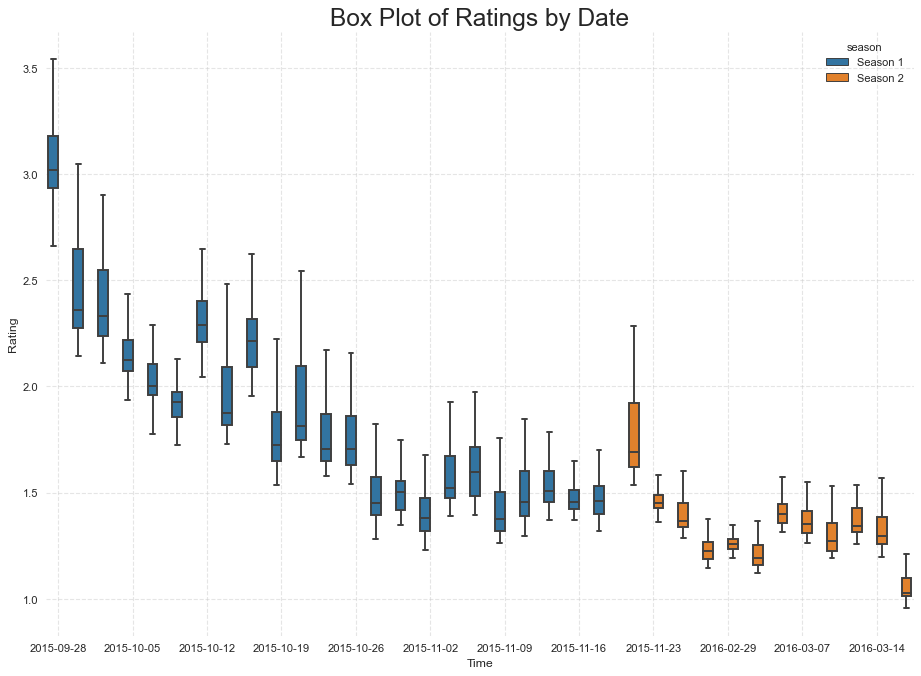

In [25]:
plt.figure(figsize=(14,10), dpi= 80)
import matplotlib.ticker as ticker

ax = sns.boxplot(x='Date', y='Rating', hue='season', data=ratings, notch=False, showfliers=False)
ax.xaxis.set_major_locator(ticker.MultipleLocator(3))

# Decorations
plt.gca().set(xlabel='Time', ylabel='Rating')
plt.title('Box Plot of Ratings by Date', fontsize=22)
plt.grid(linestyle='--', alpha=0.5)
plt.show()

In [73]:
from sklearn.utils import resample

def resampling(df, groupby_var, metrics_var):
    df = df[[groupby_var, metrics_var]]
    n_iterations = 1000
    n_size = int(len(df) * 0.50)

    # run bootstrap
    stats = list()
    for i in range(n_iterations):
        sample = resample(df, n_samples=n_size)

        # fit model
        grpmean = list(sample.groupby([groupby_var])[metrics_var].mean())
        diff = grpmean[1]-grpmean[0]
        stats.append(diff) 
    
    # confidence intervals
    alpha = 0.95
    p = ((1.0-alpha)/2.0) * 100
    est = sum(stats)/len(stats)
    lower = np.percentile(stats, p)
    p = (alpha+((1.0-alpha)/2.0)) * 100
    upper = np.percentile(stats, p)
    print('group mean %.5f' % (est))
    print('%.1f confidence interval %.5f and %.5f' % (alpha*100, lower, upper))

In [74]:
# configure bootstrap
resampling(ratings, 'season', 'Rating')

group mean -0.51617
95.0 confidence interval -0.55823 and -0.47351


In [27]:
season1, season2 = ratings.groupby(['season'])['Rating'].mean()

In [28]:
season2 - season1

-0.5161636769073596

#### Analysis for Derived Group on Length, Minute_in_Commercial, and Scheduling

In [86]:
ratings['schedule'] = ratings['dateTime'].apply(lambda x: "10 PM" if x.time()>=datetime.time(22, 0, 0) else "8 PM")

In [108]:
(pd.merge(
    (ratings.groupby(['schedule'])
     .size()
     .to_frame('count')
     .reset_index()
    ),
    (ratings.groupby(['schedule'])['Rating']
    .mean()
    .to_frame('mean')
    .reset_index()
    )
    , on="schedule")
)

,schedule,count,mean
0,10 PM,1428,1.882318
1,8 PM,660,1.325420


In [101]:
resampling(ratings, 'schedule', 'Rating')

group mean -0.55642
95.0 confidence interval -0.59221 and -0.52130


In [102]:
schedule1, schedule2 = ratings.groupby(['schedule'])['Rating'].mean()

In [103]:
schedule2 - schedule1

-0.5568979705500883

In [104]:
pd.crosstab(ratings['season'], ratings['schedule'])

schedule,10 PM,8 PM
season,,
Season 1,1368,0
Season 2,60,660


In [110]:
ratings[(ratings['schedule']=='10 PM') & (ratings['season']=='Season 2')][['dateTime']].describe()

,dateTime
count,60
unique,60
top,2016-09-14 22:27:00
freq,1
first,2016-09-14 22:00:00
last,2016-09-14 22:59:00


#### Analysis for Ratings and Total Loss % by Derived Group on Length, Minute_in_Commercial, and Scheduling

In [107]:
def shedule_len_commerical(Length, Minute_In_Commercial):
    if Length==59 and Minute_In_Commercial==0:
        return 'Length=59 and Minute_In_Commercial=0'
    elif Length==59 and Minute_In_Commercial==1:
        return 'Length=59 and Minute_In_Commercial=1'
    elif  Length==60 and Minute_In_Commercial==0:
        return 'Length=60 and Minute_In_Commercial=0'
    else:
        return 'Length=60 and Minute_In_Commercial=1'   

In [32]:
ratings['type'] = ratings.apply(lambda x: len_commerical(x.Length, x.Minute_In_Commercial), axis=1)

In [190]:
(pd.merge(
    ratings.groupby(['type'])
     .size()
     .to_frame('count')
     .reset_index(),
    ratings.groupby(['type'])['Rating']
        .mean()
        .to_frame('mean')
        .reset_index(),
    on = 'type')
)

,type,count,mean
0,Length=59 and Minute_In_Commercial=0,476,1.603662
1,Length=59 and Minute_In_Commercial=1,232,1.515727
2,Length=60 and Minute_In_Commercial=0,887,1.826142
3,Length=60 and Minute_In_Commercial=1,493,1.679408


In [204]:
numeric_vars = ratings[['Rating', 'Total_Loss_perc']]
corr_matrix = numeric_vars.corr()
corr_matrix

,Rating,Total_Loss_perc
Rating,1.00000,0.25042
Total_Loss_perc,0.25042,1.00000


In [192]:
numeric_vars1 = ratings[ratings['type']=='Length=59 and Minute_In_Commercial=0'][['Rating', 'Total_Loss_perc']]
print(numeric_vars1.corr())

numeric_vars2 = ratings[ratings['type']=='Length=59 and Minute_In_Commercial=1'][['Rating', 'Total_Loss_perc']]
print(numeric_vars2.corr())

numeric_vars3 = ratings[ratings['type']=='Length=60 and Minute_In_Commercial=0'][['Rating', 'Total_Loss_perc']]
print(numeric_vars3.corr())

numeric_vars4 = ratings[ratings['type']=='Length=60 and Minute_In_Commercial=1'][['Rating', 'Total_Loss_perc']]
print(numeric_vars4.corr())

                   Rating  Total_Loss_perc
Rating           1.000000         0.838203
Total_Loss_perc  0.838203         1.000000
                   Rating  Total_Loss_perc
Rating           1.000000         0.362348
Total_Loss_perc  0.362348         1.000000
                   Rating  Total_Loss_perc
Rating           1.000000         0.116829
Total_Loss_perc  0.116829         1.000000
                   Rating  Total_Loss_perc
Rating           1.000000         0.220804
Total_Loss_perc  0.220804         1.000000


In [197]:
avg_rate = (ratings.groupby(['date'])['Rating'].mean()
 .reset_index()
 .sort_values('date')
)
avg_total_Loss_perc = (ratings.groupby(['date'])['Total_Loss_perc'].mean()
 .reset_index()
 .sort_values('date')
)
daily_avg = pd.merge(avg_rate, avg_total_Loss_perc, on='date')

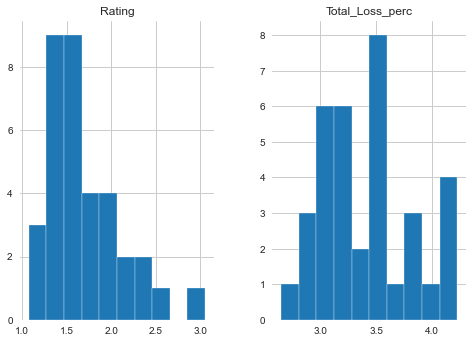

In [198]:
daily_avg.hist()
plt.show()

In [199]:
corr_matrix = daily_avg.corr()
corr_matrix

,Rating,Total_Loss_perc
Rating,1.000000,-0.500705
Total_Loss_perc,-0.500705,1.000000


In [205]:
daily_avg[-10:-1]

,date,Rating,Total_Loss_perc
25,2016-09-28,1.416605,4.226916
26,2016-10-05,1.252120,3.529737
27,2016-10-12,1.276814,3.275362
28,2016-10-19,1.225611,3.776977
29,2016-10-26,1.415415,3.883543
30,2016-11-09,1.388519,4.132580
31,2016-11-16,1.308123,4.141856
32,2017-01-04,1.394666,4.184813
33,2017-01-11,1.348449,4.053781


### Models using Program Ratings for Mr.Bl@ck.s.bot

In [11]:
program_black.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4374 entries, 2 to 4596
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Unnamed: 0          4374 non-null   int64         
 1   show_name           4371 non-null   object        
 2   network             4374 non-null   object        
 3   genre               4374 non-null   object        
 4   time_slot           4374 non-null   object        
 5   program_start_time  4374 non-null   datetime64[ns]
 6   program_duration    4374 non-null   int64         
 7   show_premier        4374 non-null   int64         
 8   show_repeat         4374 non-null   int64         
 9   rating              4374 non-null   float64       
 10  date                4374 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 410.1+ KB


In [63]:
program_black['slot'] = program_black['program_start_time'].apply(lambda x: x.time())

### Analysis on rating difference between two slots for all shows

In [159]:
avg_rating = program_black.groupby(['date', 'slot'])['rating'].mean().to_frame('avg_rating').reset_index()

In [160]:
avg_rating = avg_rating[((avg_rating.slot==datetime.time(20, 0, 0)) | (avg_rating.slot==datetime.time(22, 0, 0)))]

In [161]:
avg_rating_twoslots = avg_rating.pivot(index='date', columns='slot',values='avg_rating').reset_index()

In [162]:
avg_rating_twoslots.columns =['date', '20:00:00', '22:00:00']

In [163]:
avg_rating_twoslots

,date,20:00:00,22:00:00
0,2015-09-21,0.038502,0.036800
1,2015-09-22,0.035066,0.030551
2,2015-09-23,0.026849,0.015880
3,2015-09-24,0.020217,0.021969
4,2015-09-25,0.014653,0.030231
...,...,...,...
472,2017-01-14,0.008734,0.009278
473,2017-01-15,0.021500,0.011431
474,2017-01-16,0.018833,0.018862
475,2017-01-17,0.024801,0.019762


In [164]:
np.mean(avg_rating_twoslots['20:00:00']-avg_rating_twoslots['22:00:00'])

0.0016232609666991837

In [165]:
import pandas as pd 
from scipy import stats 

In [166]:
avg_rating_twoslots = avg_rating_twoslots.dropna()

In [167]:
avg_rating_twoslots.describe()

,20:00:00,22:00:00
count,388.000000,388.000000
mean,0.019834,0.018210
std,0.007380,0.007592
min,0.003957,0.004026
25%,0.014326,0.013130
50%,0.019365,0.017578
75%,0.025130,0.021804
max,0.055210,0.042432


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13b9631d0>,
      dtype=object)

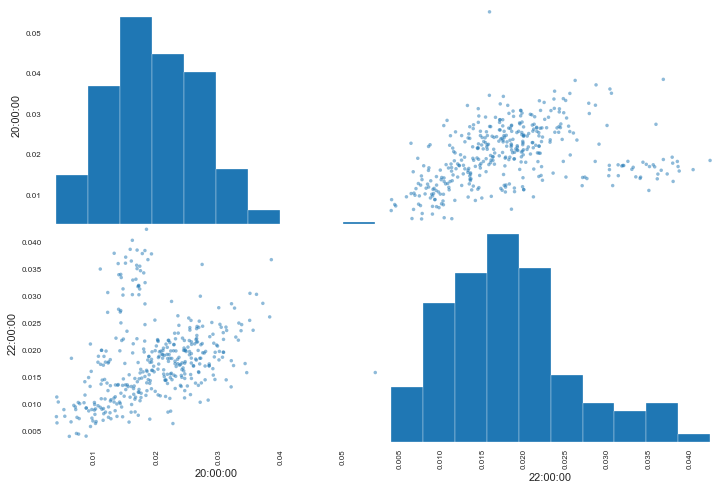

In [182]:
from pandas.plotting import scatter_matrix

attributes = ["20:00:00", "22:00:00"]
scatter_matrix(avg_rating_twoslots[attributes], figsize=(12, 8))

In [168]:
one_way_anova = stats.f_oneway(avg_rating_twoslots['20:00:00'], avg_rating_twoslots['22:00:00']) 
one_way_anova

F_onewayResult(statistic=9.120829199855573, pvalue=0.00261025219245962)

In [169]:
stats.ttest_ind(avg_rating_twoslots['20:00:00'], avg_rating_twoslots['22:00:00']) 

Ttest_indResult(statistic=3.020071058742752, pvalue=0.0026102521924597577)

### Analysis on rating difference between two slotson DKN and Drama

In [183]:
filtered = program_black[(program_black.genre == 'Drama') & (program_black.network =='DKN')]

,Unnamed: 0,show_name,network,genre,time_slot,program_start_time,program_duration,show_premier,show_repeat,rating,date,slot
3734,3734,PERSECUTION,DKN,Drama,2015-09-23 21:00:00,2015-09-23 21:00:00,7200,1,0,0.028989,2015-09-23,21:00:00
3735,3735,PERSECUTION,DKN,Drama,2015-09-30 21:00:00,2015-09-30 21:00:00,3600,0,0,0.023574,2015-09-30,21:00:00
3736,3736,PERSECUTION,DKN,Drama,2015-10-07 21:00:00,2015-10-07 21:00:00,3600,0,0,0.022886,2015-10-07,21:00:00
3737,3737,PERSECUTION,DKN,Drama,2015-10-14 21:00:00,2015-10-14 21:00:00,3600,0,0,0.022554,2015-10-14,21:00:00
3738,3738,PERSECUTION,DKN,Drama,2015-10-21 21:00:00,2015-10-21 21:00:00,3600,0,0,0.022801,2015-10-21,21:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
4579,4579,FUTURE IS NOW,DKN,Drama,2016-12-05 22:00:00,2016-12-05 22:01:00,3540,0,0,0.017831,2016-12-05,22:01:00
4580,4580,FUTURE IS NOW,DKN,Drama,2016-12-12 22:00:00,2016-12-12 22:01:00,3540,0,0,0.014195,2016-12-12,22:01:00
4581,4581,FUTURE IS NOW,DKN,Drama,2017-01-16 22:00:00,2017-01-16 22:00:00,3600,0,0,0.011333,2017-01-16,22:00:00
4592,4592,BEYOND THE LAND,DKN,Drama,2017-01-06 21:00:00,2017-01-06 21:00:00,7200,1,0,0.015015,2017-01-06,21:00:00


In [188]:
filtered.show_name

3734        PERSECUTION
3735        PERSECUTION
3736        PERSECUTION
3737        PERSECUTION
3738        PERSECUTION
             ...       
4579      FUTURE IS NOW
4580      FUTURE IS NOW
4581      FUTURE IS NOW
4592    BEYOND THE LAND
4593    BEYOND THE LAND
Name: show_name, Length: 388, dtype: object

In [184]:
filtered.describe()

,Unnamed: 0,program_duration,show_premier,show_repeat,rating
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,4174.038660,3680.257732,0.069588,0.115979,0.019075
std,244.495073,592.360439,0.254779,0.320614,0.006530
min,3734.000000,780.000000,0.000000,0.000000,0.003805
25%,4039.750000,3600.000000,0.000000,0.000000,0.014097
50%,4159.500000,3600.000000,0.000000,0.000000,0.019850
75%,4354.250000,3600.000000,0.000000,0.000000,0.023590
max,4593.000000,7200.000000,1.000000,1.000000,0.036800


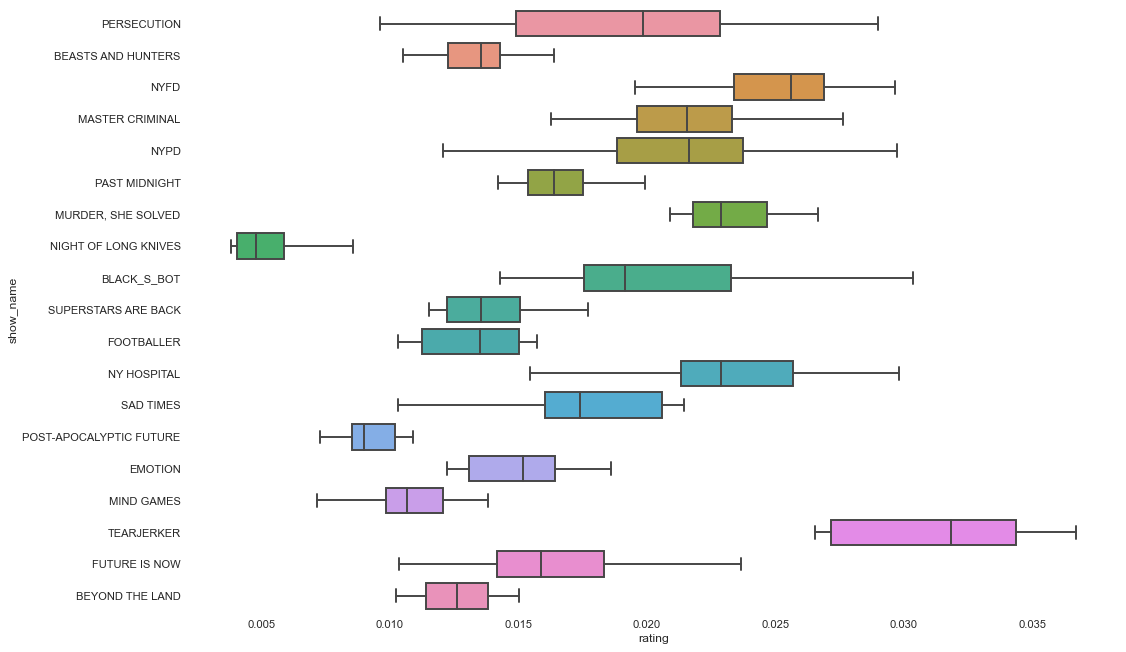

In [189]:
plt.figure(figsize=(15,10), dpi= 80)
sns.boxplot(x='rating', y='show_name', data=filtered, notch=False, showfliers=False)

In [193]:
filtered.show_name.nunique()

19

In [171]:
avg_rating_filter = filtered.groupby(['date', 'slot'])['rating'].mean().to_frame('avg_rating').reset_index()

In [172]:
avg_rating_filter= avg_rating_filter[((avg_rating_filter.slot==datetime.time(20, 0, 0)) | (avg_rating_filter.slot==datetime.time(22, 0, 0)))]

In [173]:
avg_rating_filtertwoslots = avg_rating_filter.pivot(index='date', columns='slot', values='avg_rating').reset_index()

In [174]:
avg_rating_filtertwoslots.columns =['date', '20:00:00', '22:00:00']

In [175]:
avg_rating_filtertwoslots

,date,20:00:00,22:00:00
0,2015-09-21,NaN,0.036800
1,2015-09-23,0.024430,NaN
2,2015-09-24,0.021749,0.015712
3,2015-09-28,NaN,0.030369
4,2015-09-30,0.022798,0.020843
...,...,...,...
153,2017-01-12,NaN,0.017173
154,2017-01-13,0.014479,NaN
155,2017-01-16,NaN,0.011333
156,2017-01-17,NaN,0.025594


In [176]:
avg_rating_filtertwoslots = avg_rating_filtertwoslots.dropna()

In [177]:
avg_rating_twoslots.describe()

,20:00:00,22:00:00
count,388.000000,388.000000
mean,0.019834,0.018210
std,0.007380,0.007592
min,0.003957,0.004026
25%,0.014326,0.013130
50%,0.019365,0.017578
75%,0.025130,0.021804
max,0.055210,0.042432


In [178]:
avg_rating_filtertwoslots.columns

Index(['date', '20:00:00', '22:00:00'], dtype='object')

In [179]:
one_way_anova = stats.f_oneway(avg_rating_filtertwoslots['20:00:00'], avg_rating_filtertwoslots['22:00:00']) 
one_way_anova

F_onewayResult(statistic=8.215456424141063, pvalue=0.0049626243474222035)

In [180]:
stats.ttest_ind(avg_rating_filtertwoslots['20:00:00'], avg_rating_filtertwoslots['22:00:00']) 

Ttest_indResult(statistic=-2.8662617508073223, pvalue=0.0049626243474222296)

In [181]:
np.mean(avg_rating_filtertwoslots['20:00:00']-avg_rating_filtertwoslots['22:00:00'])

-0.002694104144281806

In [12]:
from sklearn.linear_model import LinearRegression

/usr/local/Cellar/python/3.7.6_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/local/Cellar/python/3.7.6_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [21]:
program_black[:2]

,Unnamed: 0,show_name,network,genre,time_slot,program_start_time,program_duration,show_premier,show_repeat,rating,date
2,2,OF WOLVES AND MAN,JGN,Drama,2015-09-27 20:00:00,2015-09-27 20:00:00,3600,1,0,0.021757,2015-09-27
3,3,OF WOLVES AND MAN,JGN,Drama,2015-10-04 20:00:00,2015-10-04 20:00:00,3600,0,0,0.018664,2015-10-04


In [32]:
program_black_prepared = program_black[['rating']].copy()
program_black_prepared = program_black_prepared.values.reshape((-1, 1))

In [47]:
lin_reg = LinearRegression()

In [53]:
var1 = program_black.program_duration.values.reshape((-1, 1))
var2 = program_black.show_premier.values.reshape((-1, 1))

In [57]:
X = np.concatenate((var1,var2), axis = 1)
lin_reg.fit(X, program_black['rating'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
lin_reg.fit(program_black_prepared, program_black_prepared.rating)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
program_black_prepared_predictions = lin_reg.predict(program_black_prepared)

In [45]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(program_black_prepared.rating, program_black_prepared_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

2.1960446354154666e-18